In [356]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
# Import stats from scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [357]:
df_in=pd.read_csv("G:\modelues\project\insurance_part2_data.csv")

In [358]:
df_in.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


## 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [359]:
df_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [360]:
df_in.duplicated().sum()

139

In [361]:
df_in.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [362]:
df_in.shape

(3000, 10)

In [363]:
df_in.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


In [364]:
df_in['Age'].value_counts()

36    999
31    125
48    108
30     96
35     94
     ... 
8       1
84      1
83      1
15      1
11      1
Name: Age, Length: 70, dtype: int64

In [365]:
for column in df_in:
    print(df_in[column].value_counts(ascending=True))
    print('\n')

11      1
83      1
84      1
8       1
15      1
     ... 
35     94
30     96
48    108
31    125
36    999
Name: Age, Length: 70, dtype: int64


JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


Yes     924
No     2076
Name: Claimed, dtype: int64


0.70         1
208.00       1
24.50        1
6.38         1
28.25        1
          ... 
17.82       57
54.00       61
23.76       61
63.21       62
0.00      1366
Name: Commision, Length: 324, dtype: int64


Offline      46
Online     2954
Name: Channel, dtype: int64


416     1
204     1
160     1
180     1
173     1
       ..
11     81
6      81
10     81
5      82
8      83
Name: Duration, Length: 257, dtype: int64


2.51        1
25.50       1
320.00      1
4.44        1
62.25       1
         ... 
216.00     59
252.85     60
22.00      79
10.00     163
20.00     225
Name: Sales, Length: 380, dtype: int64


Gold Plan             10

In [366]:
dups=df_in.duplicated()
dups.sum()

139

In [367]:
df_in[dups]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [368]:
df_in.duplicated().sum()

139

In [369]:
dups=df_in.duplicated()
df_in[dups]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [370]:
dups=df_in.drop_duplicates(inplace=True)
df_in.duplicated().sum()

0

In [371]:
df_in.shape

(2861, 10)

<AxesSubplot:>

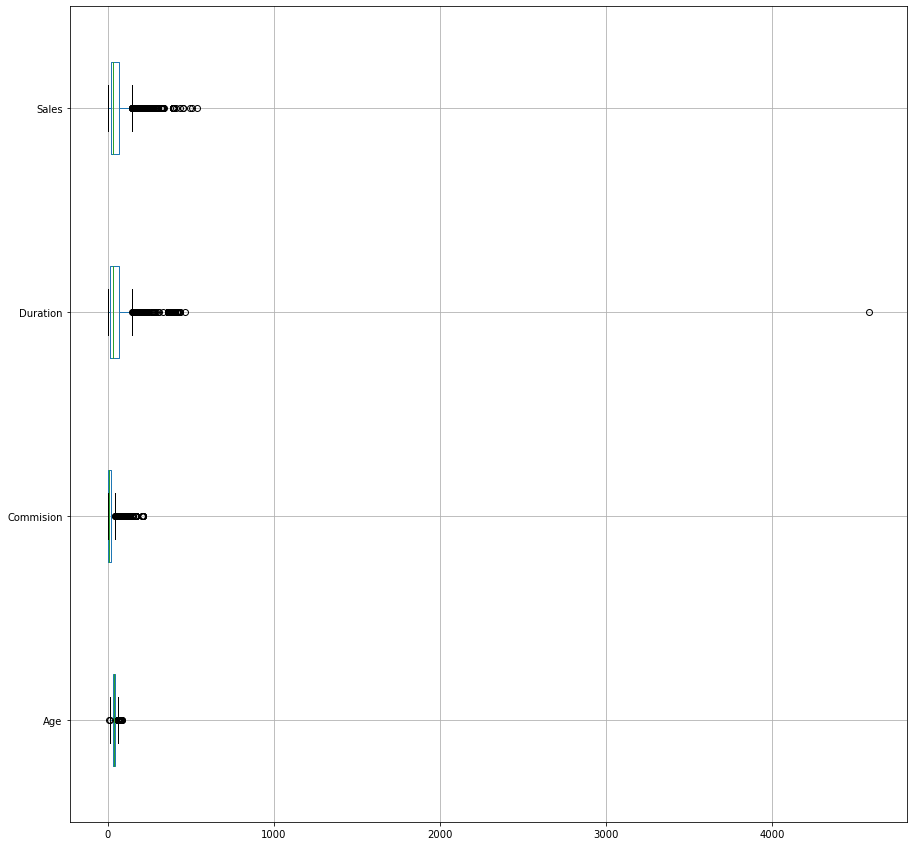

In [372]:
plt.figure(figsize=(15,15))
df_in[['Age','Commision','Duration','Sales']].boxplot(vert=0)

Text(0.5, 1.0, 'Duration')

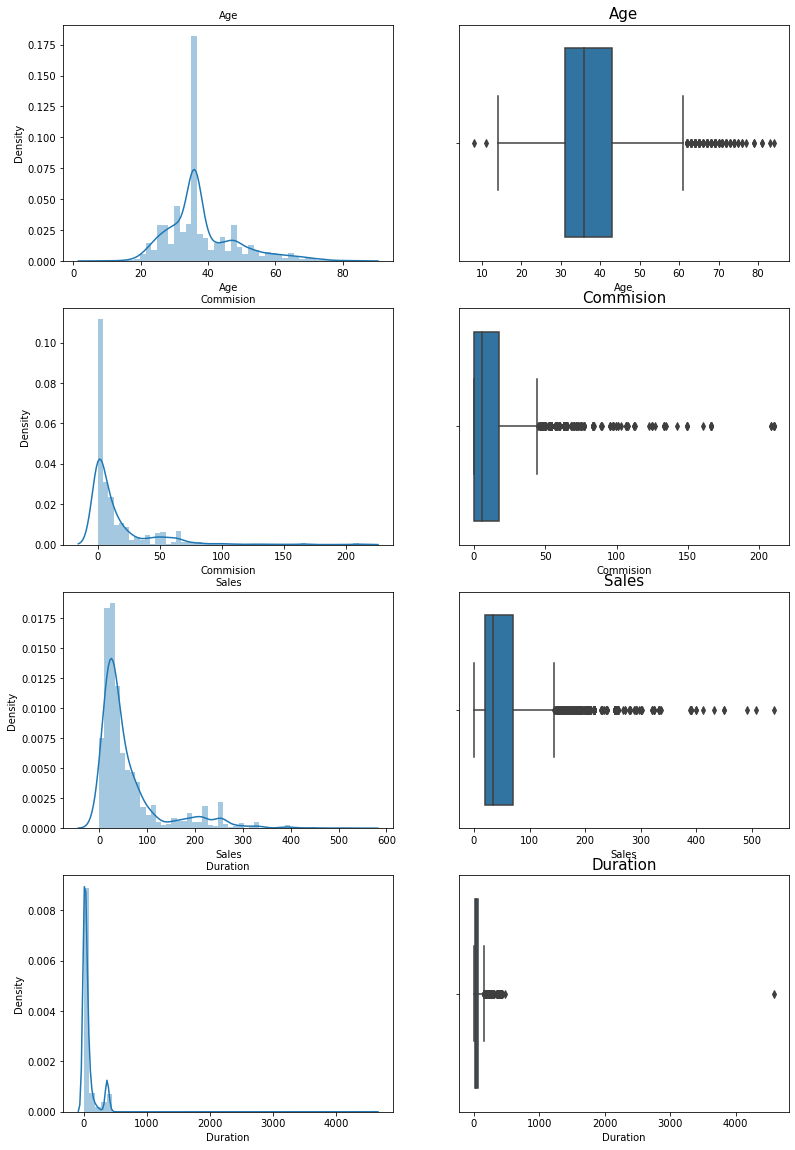

In [375]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(13, 20)

a = sns.distplot(df_in['Age'] , ax=axes[0][0])
a.set_title("Age",fontsize=10)
a = sns.boxplot(df_in['Age'] , orient = "v" , ax=axes[0][1])
a.set_title("Age",fontsize=15)

a = sns.distplot(df_in['Commision'] , ax=axes[1][0])
a.set_title("Commision",fontsize=10)
a = sns.boxplot(df_in['Commision'] , orient = "v" , ax=axes[1][1])
a.set_title("Commision",fontsize=15)

               
a = sns.distplot(df_in['Sales'] , ax=axes[2][0])
a.set_title("Sales",fontsize=10)
a = sns.boxplot(df_in['Sales'] , orient = "v" , ax=axes[2][1])
a.set_title("Sales",fontsize=15)

a = sns.distplot(df_in['Duration'] , ax=axes[3][0])
a.set_title("Duration",fontsize=10)
a = sns.boxplot(df_in['Duration'] , orient = "v" , ax=axes[3][1])
a.set_title("Duration",fontsize=15)

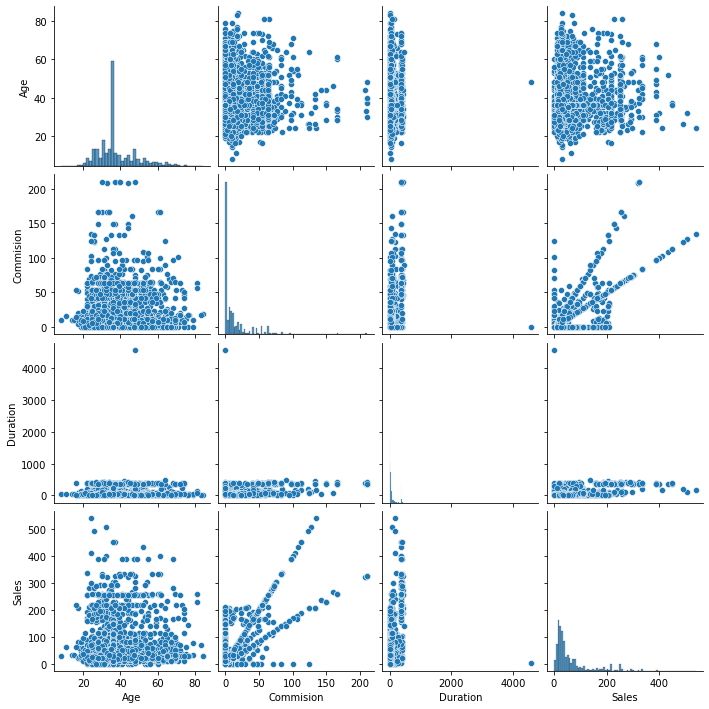

In [262]:
sns.pairplot(df_in)

<AxesSubplot:xlabel='Agency_Code', ylabel='count'>

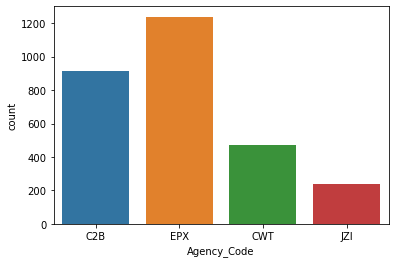

In [263]:
sns.countplot(data=df_in,x='Agency_Code')

<AxesSubplot:xlabel='Agency_Code', ylabel='Sales'>

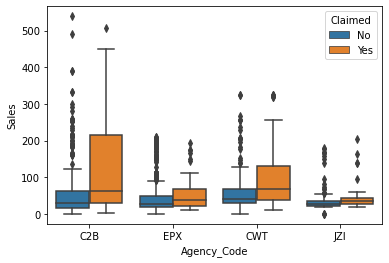

In [264]:
sns.boxplot(data=df_in,x='Agency_Code',y='Sales',hue='Claimed')

<AxesSubplot:xlabel='Type', ylabel='count'>

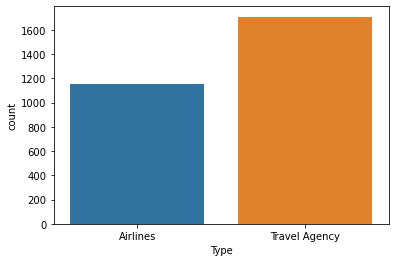

In [265]:
sns.countplot(data=df_in,x='Type')

<AxesSubplot:xlabel='Type', ylabel='Sales'>

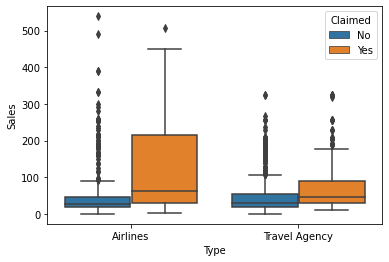

In [266]:
sns.boxplot(data=df_in,x='Type',y='Sales',hue='Claimed')

<AxesSubplot:xlabel='Channel', ylabel='count'>

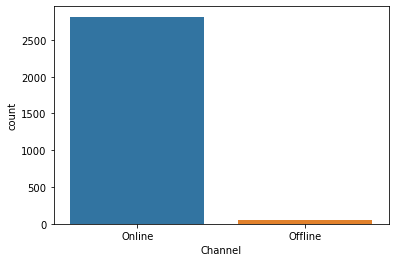

In [267]:
sns.countplot(data=df_in,x='Channel')

<AxesSubplot:xlabel='Channel', ylabel='Sales'>

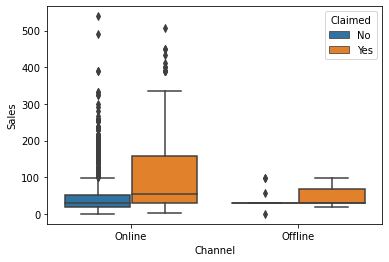

In [268]:
sns.boxplot(data=df_in,x='Channel',y='Sales',hue='Claimed')

<AxesSubplot:xlabel='Product Name', ylabel='count'>

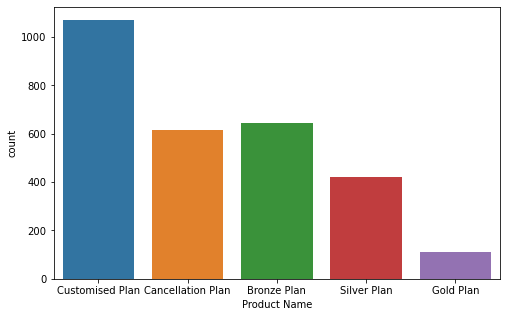

In [269]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_in,x='Product Name')

<AxesSubplot:xlabel='Product Name', ylabel='Sales'>

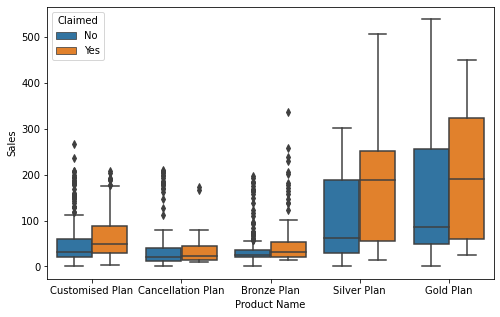

In [270]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_in,x='Product Name',y='Sales',hue='Claimed')

<AxesSubplot:xlabel='Destination', ylabel='count'>

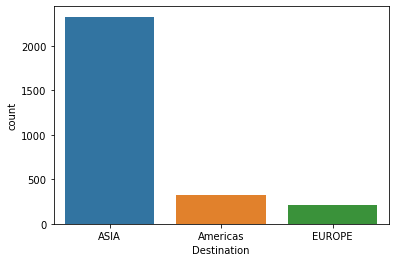

In [271]:
sns.countplot(data=df_in,x='Destination')

<AxesSubplot:xlabel='Destination', ylabel='Sales'>

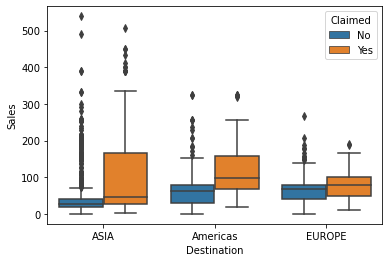

In [272]:
sns.boxplot(data=df_in,x='Destination',y='Sales',hue='Claimed')

In [273]:
df_corr=df_in.corr()
df_corr

,Age,Commision,Duration,Sales
Age,1.000000,0.064759,0.027457,0.036187
Commision,0.064759,1.000000,0.462114,0.762181
Duration,0.027457,0.462114,1.000000,0.549889
Sales,0.036187,0.762181,0.549889,1.000000


<AxesSubplot:>

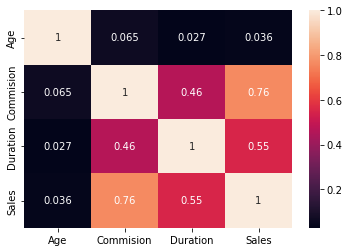

In [274]:
sns.heatmap(df_corr,fmt='.2g',annot=True,linecolor='red')

In [275]:
df_in['Claimed'].value_counts(normalize=True)

No     0.680531
Yes    0.319469
Name: Claimed, dtype: float64

In [276]:
for i in df_in.columns:
    if df_in[i].dtype=='object':
        print('\n')
        print('i',i)
        print(pd.Categorical(df_in[i].unique()))
        print(pd.Categorical(df_in[i].unique()).codes)
        df_in[i]=pd.Categorical(df_in[i]).codes



i Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


i Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


i Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


i Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


i Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


i Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [277]:
x=df_in.drop("Claimed",axis=1)


y=df_in.pop("Claimed")

In [278]:
x.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


## splitting into training and testing

In [279]:
from sklearn.model_selection import train_test_split

In [280]:
x_train, x_test, train_labels, test_labels=train_test_split(x,y,test_size=.30,random_state=5)

In [281]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [282]:
print('x_train',x_train.shape)
print('x_test',x_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

x_train (2002, 9)
x_test (859, 9)
train_labels (2002,)
test_labels (859,)


In [283]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [284]:
grid_search_dtcl.fit(x_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 300}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=300,
                       random_state=1)

In [285]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3, 5, 7, 10,12],
    'min_samples_leaf': [20,30,40,50,60], 
    'min_samples_split': [150,300,450],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [286]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [3.5,4.0,4.5, 5.0,5.5],
    'min_samples_leaf': [40, 42, 44,46,48,50,52,54], 
    'min_samples_split': [250, 270, 280, 290, 300,310],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [287]:
grid_search_dtcl.fit(x_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 5.0, 'min_samples_leaf': 42, 'min_samples_split': 250}


DecisionTreeClassifier(max_depth=5.0, min_samples_leaf=42,
                       min_samples_split=250, random_state=1)

In [288]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [4.85, 4.90,4.95, 5.0,5.05,5.10,5.15],
    'min_samples_leaf': [40, 41, 42, 43, 44], 
    'min_samples_split': [150, 175, 200, 210, 220, 230, 240, 250, 260, 270],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

## generating tree using best parameter

In [289]:
train_char_label = ['no', 'yes']
tree_regularized = open('G:\modelues\project\insurance_part2_data.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = list(x_train),
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [290]:
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.608787
Sales         0.206681
Product Name  0.085441
Duration      0.059490
Age           0.028028
Commision     0.011574
Type          0.000000
Channel       0.000000
Destination   0.000000


## Predicting on Training and Test dataset

In [291]:
ytrain_predict_dtcl = best_grid_dtcl.predict(x_train)
ytest_predict_dtcl = best_grid_dtcl.predict(x_test)

## Getting the Predicted Classes and Probs

In [292]:
ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(x_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.343066,0.656934
1,0.343066,0.656934
2,0.852941,0.147059
3,0.343066,0.656934
4,0.208955,0.791045


## Building a Random Forest Classifier

In [293]:
param_grid_rfcl = {
    'max_depth': [4,5,6],
    'max_features': [2,3,4,5],
    'min_samples_leaf': [8,9,11,15],
    'min_samples_split': [46,50,55],
    'n_estimators': [290,350,400]
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [295]:
grid_search_rfcl.fit(x_train, train_labels)
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

{'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 9, 'min_samples_split': 50, 'n_estimators': 350}


RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=9,
                       min_samples_split=50, n_estimators=350, random_state=1)

## Predicting the Training and Testing data

In [296]:
ytrain_predict_rfcl = best_grid_rfcl.predict(x_train)
ytest_predict_rfcl = best_grid_rfcl.predict(x_test)

## Getting the Predicted Classes and Probs

In [298]:
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(x_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.320022,0.679978
1,0.409195,0.590805
2,0.909398,0.090602
3,0.307967,0.692033
4,0.192523,0.807477


## Variable Importance via RF

In [300]:
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = x_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.328744
Product Name  0.247950
Sales         0.176545
Commision     0.097763
Duration      0.063332
Type          0.042416
Age           0.036395
Destination   0.006219
Channel       0.000635


## Building a Neural Network Classifier

In [301]:
param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200], # 50, 200
    'max_iter': [2500,3000,4000], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [303]:
grid_search_nncl.fit(x_train, train_labels)
grid_search_nncl.best_params_
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=50, max_iter=2500, random_state=1, tol=0.01)

## Predicting the Training and Testing data

In [305]:
ytrain_predict_nncl = best_grid_nncl.predict(x_train)
ytest_predict_nncl = best_grid_nncl.predict(x_test)

## Getting the Predicted Classes and Probs¶

In [307]:
ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(x_test)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

,0,1
0,0.454200,0.545800
1,0.352656,0.647344
2,0.925234,0.074766
3,0.118354,0.881646
4,0.341589,0.658411


## 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

## CART - AUC and ROC for the training data

AUC: 0.820


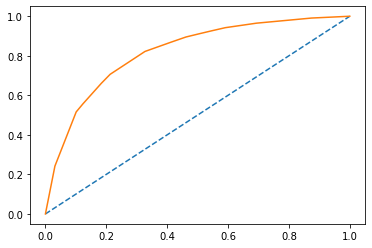

In [309]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(x_train)

# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]

# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)

# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

## CART -AUC and ROC for the test data

AUC: 0.788


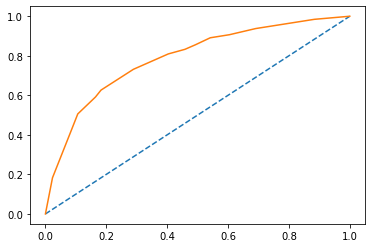

In [311]:
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(x_test)

# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]

# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)

# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

## CART Confusion Matrix and Classification Report for the training data

In [312]:
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1209,  136],
       [ 318,  339]], dtype=int64)

In [314]:
cart_train_acc=best_grid_dtcl.score(x_train,train_labels) 
cart_train_acc

0.7732267732267732

In [315]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84      1345
           1       0.71      0.52      0.60       657

    accuracy                           0.77      2002
   macro avg       0.75      0.71      0.72      2002
weighted avg       0.77      0.77      0.76      2002



## CART Confusion Matrix and Classification Report for the testing data

In [316]:
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[550,  52],
       [147, 110]], dtype=int64)

In [319]:
cart_test_acc=best_grid_dtcl.score(x_test,test_labels)
cart_test_acc

0.7683352735739232

In [318]:
print(classification_report(test_labels, ytest_predict_dtcl))


              precision    recall  f1-score   support

           0       0.79      0.91      0.85       602
           1       0.68      0.43      0.53       257

    accuracy                           0.77       859
   macro avg       0.73      0.67      0.69       859
weighted avg       0.76      0.77      0.75       859



## RF Model Performance Evaluation on Training data

In [320]:
confusion_matrix(train_labels,ytrain_predict_rfcl)

array([[1167,  178],
       [ 246,  411]], dtype=int64)

In [322]:
rf_train_acc=best_grid_rfcl.score(x_train,train_labels) 
rf_train_acc

0.7882117882117882

In [323]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1345
           1       0.70      0.63      0.66       657

    accuracy                           0.79      2002
   macro avg       0.76      0.75      0.75      2002
weighted avg       0.78      0.79      0.79      2002



Area under Curve is 0.8403325921022107


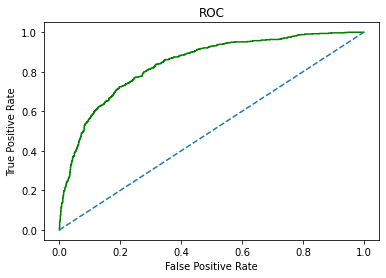

In [326]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(x_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(x_train)[:,1])
print('Area under Curve is', rf_train_auc)

## RF Model Performance Evaluation on Test data

In [327]:
confusion_matrix(test_labels,ytest_predict_rfcl)

array([[531,  71],
       [116, 141]], dtype=int64)

In [329]:
rf_test_acc=best_grid_rfcl.score(x_test,test_labels)
rf_test_acc

0.7823050058207218

In [330]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       602
           1       0.67      0.55      0.60       257

    accuracy                           0.78       859
   macro avg       0.74      0.72      0.73       859
weighted avg       0.77      0.78      0.78       859



Area under Curve is 0.8063717569192187


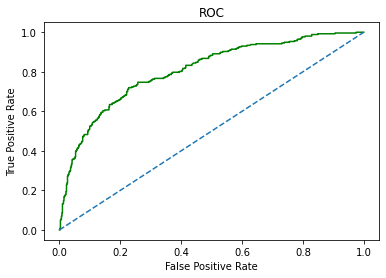

In [331]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(x_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(x_test)[:,1])
print('Area under Curve is', rf_test_auc)

## NN Model Performance Evaluation on Training data

In [332]:
confusion_matrix(train_labels,ytrain_predict_nncl)

array([[1243,  102],
       [ 388,  269]], dtype=int64)

In [335]:
nn_train_acc=best_grid_nncl.score(x_train,train_labels) 
nn_train_acc

0.7552447552447552

In [336]:
print(classification_report(train_labels,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.76      0.92      0.84      1345
           1       0.73      0.41      0.52       657

    accuracy                           0.76      2002
   macro avg       0.74      0.67      0.68      2002
weighted avg       0.75      0.76      0.73      2002



Area under Curve is 0.7834688484889636


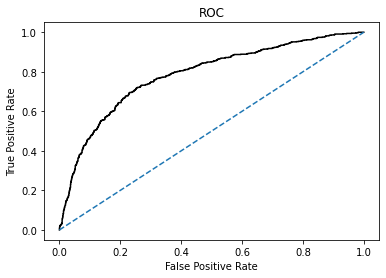

In [338]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid_nncl.predict_proba(x_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid_nncl.predict_proba(x_train)[:,1])
print('Area under Curve is', nn_train_auc)

## NN Model Performance Evaluation on Test data

In [339]:
confusion_matrix(test_labels,ytest_predict_nncl)

array([[559,  43],
       [161,  96]], dtype=int64)

In [342]:
nn_test_acc=best_grid_nncl.score(x_test,test_labels)
nn_test_acc

0.7625145518044237

In [343]:
print(classification_report(test_labels,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       602
           1       0.69      0.37      0.48       257

    accuracy                           0.76       859
   macro avg       0.73      0.65      0.67       859
weighted avg       0.75      0.76      0.74       859



Area under Curve is 0.7613467430226095


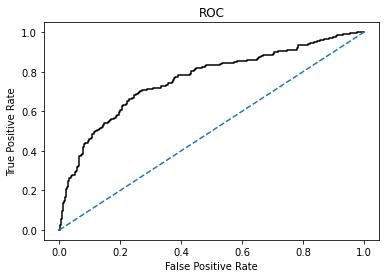

In [345]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid_nncl.predict_proba(x_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid_nncl.predict_proba(x_test)[:,1])
print('Area under Curve is', nn_test_auc)

## 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

In [346]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

NameError: name 'cart_train_recall' is not defined

## 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

ROC Curve for the 3 models on the Training data

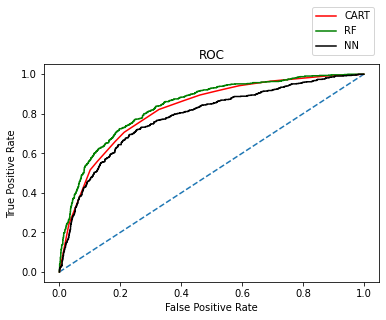

In [347]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

ROC Curve for the 3 models on the Test data

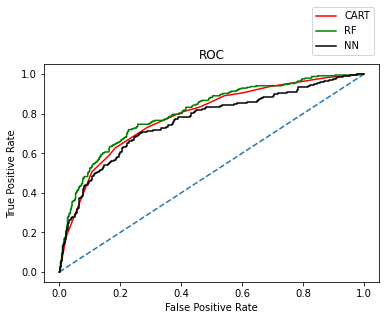

In [348]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')